# Principle Component Analysis

Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation which converts a set of correlated variables to a set of uncorrelated variables. PCA is a most widely used tool in exploratory data analysis and in machine learning for predictive models. 

Moreover, PCA is an unsupervised statistical technique used to examine the interrelations among a set of variables. It is also known as a general factor analysis where regression determines a line of best fit.

### PCA Covariance Method

It can be thought of as a projection method where data with m-columns (features) is projected into a subspace with m or fewer columns, whilst retaining the essence of the original data.

The PCA method can be described and implemented using the tools of linear algebra.

1. Center the values in each column by subtracting the mean column value.
2. Calculate the covariance matrix of the centered matrix.
    - This measure of how much two random variables vary together, along the diagonal is the variation of that single random variable.
3. Calculate the eigendecomposition of the covariance matrix.
    - If the eigenvalues have a similar value, the existing representation may already be reasonably compressed. Projection isnt necessary. 
    - If some eigenvalues close to zero, they represent components of the the subspace that may be discarded.
4. Select k eigenvectors that have the k largest eigenvalues. These are the principal components.
5. Data is then projected into the subspace via matrix multiplication.

In [36]:
# Necessary Python Packages
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

# define a matrix
A = array([[1, 2], [3, 4], [5, 6]])
print('Original Matrix:')
print(A)
print('\n')

# calculate the mean of each column
M = mean(A.T, axis=1)
print('Column Means:')
print(M)
print('\n')

# center columns by subtracting column means
C = A - M
print('Centered Matrix:')
print(C)
print('\n')

# calculate covariance matrix of centered matrix
V = cov(C.T)
print('Covariance Matrix:')
print(V)
print('\n')

# eigendecomposition of covariance matrix
values, vectors = eig(V)
print('Eigen Vectors:')
print(vectors)
print('Eigen Value:')
print(values)
print('\n')

# project data
P = vectors.T.dot(C.T)
print(P.T)

Original Matrix:
[[1 2]
 [3 4]
 [5 6]]


Column Means:
[3. 4.]


Centered Matrix:
[[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]]


Covariance Matrix:
[[4. 4.]
 [4. 4.]]


Eigen Vectors:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Eigen Value:
[8. 0.]


[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]


### PCA using SKlearn

Using the PCA() class in the scikit-learn library, we can eaily apply this to other larger datasets.

In [37]:
# Principal Component Analysis
from sklearn.decomposition import PCA

# Here we are using inbuilt dataset of scikit learn 
from sklearn.datasets import load_wine

# instantiating 
wine = load_wine()  

# creating dataframe 
df = pd.DataFrame(wine['data'], columns = wine['feature_names']) 

# Saving the dataframe as Matrix A
A = np.array(df)
#print(A)

# create the PCA instance
pca = PCA(2)

# fit on data
pca.fit(A)

# access values and vectors
print(pca.components_)
print('\n')
print(pca.explained_variance_)

# transform data
B = pca.transform(A)
print('\n')
print(B)

[[ 1.65926472e-03 -6.81015556e-04  1.94905742e-04 -4.67130058e-03
   1.78680075e-02  9.89829680e-04  1.56728830e-03 -1.23086662e-04
   6.00607792e-04  2.32714319e-03  1.71380037e-04  7.04931645e-04
   9.99822937e-01]
 [ 1.20340617e-03  2.15498184e-03  4.59369254e-03  2.64503930e-02
   9.99344186e-01  8.77962152e-04 -5.18507284e-05 -1.35447892e-03
   5.00440040e-03  1.51003530e-02 -7.62673115e-04 -3.49536431e-03
  -1.77738095e-02]]


[99201.78951748   172.53526648]


[[ 3.18562979e+02  2.14921307e+01]
 [ 3.03097420e+02 -5.36471768e+00]
 [ 4.38061133e+02 -6.53730945e+00]
 [ 7.33240139e+02  1.92729032e-01]
 [-1.15714285e+01  1.84899946e+01]
 [ 7.03231192e+02 -3.32158674e-01]
 [ 5.42971581e+02 -1.35189666e+01]
 [ 5.48401860e+02  1.14494324e+01]
 [ 2.98036863e+02 -8.18015784e+00]
 [ 2.98049553e+02 -7.10154294e+00]
 [ 7.63079712e+02 -8.33431723e+00]
 [ 5.32943228e+02 -1.42876338e+01]
 [ 5.72834410e+02 -2.10050143e+01]
 [ 4.02925358e+02 -1.61026352e+01]
 [ 8.00053394e+02 -1.21184472e+01]
 [ 5

### PCA for Data Visualization in Sklearn

In [38]:
#Necessary Packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# creating dataframe 
df = pd.DataFrame(wine['data'], columns = wine['feature_names']) 
  
# checking head of dataframe 
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [45]:
## PREFORMING PCA

# Importing standardscalar module  
from sklearn.preprocessing import StandardScaler 
  
scalar = StandardScaler() 
  
# fitting 
scalar.fit(df) 
scaled_data = scalar.transform(df) 
  
# Importing PCA 
from sklearn.decomposition import PCA 
  
# Obtaining the main 2 principle components 
pca = PCA(n_components = 4) 
pca.fit(scaled_data) 
x_pca = pca.transform(scaled_data) 
  
x_pca.shape 

(178, 4)

Our new dataset now contains only 2 principle components.

In [46]:
# Explained variance per PC
pca.explained_variance_ratio_# Cumulative explained variance

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 ])

As we see here, PC1 explains 36% of our data and slowly decrease as we move through the 4 chosen components.

Text(0, 0.5, 'Second Principal Component')

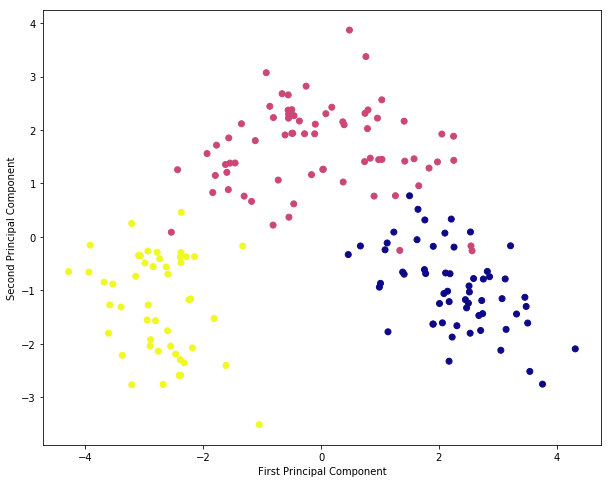

In [47]:
## Plot of our first 2 components

# giving a larger plot 
plt.figure(figsize =(10, 8)) 
  
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = wine['target'], cmap ='plasma') 
  
# labeling x and y axes 
plt.xlabel('First Principal Component') 
plt.ylabel('Second Principal Component') 

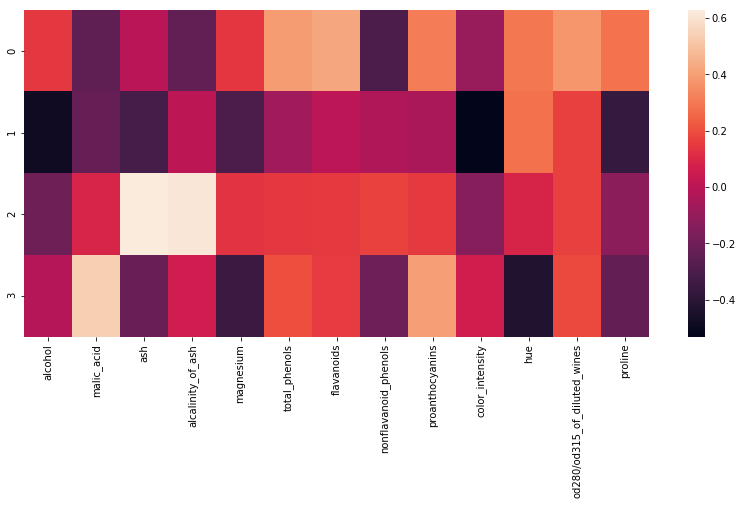

In [48]:
## Heatmap of our 4 chose components

df_comp = pd.DataFrame(pca.components_, columns = wine['feature_names']) 
  
plt.figure(figsize =(14, 6)) 
  
# plotting heatmap 
sns.heatmap(df_comp) 